In [55]:
!pip install lightgbm

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgbm

# Data Preprocess

In [57]:
data = pd.read_csv('https://raw.githubusercontent.com/mtpa/mds/master/MDS_Chapter_3/bank.csv', sep = ';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  response   4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


**"age" column**

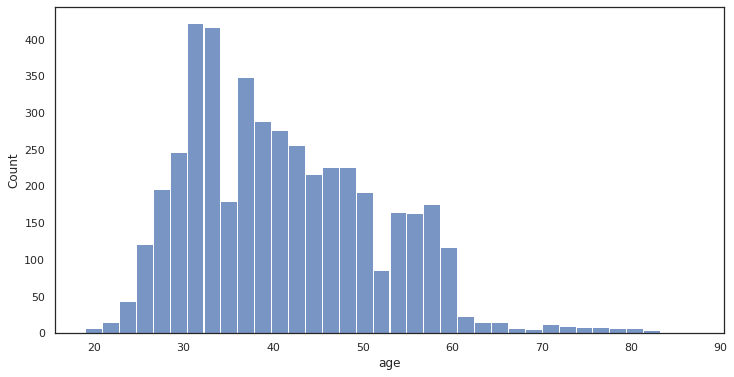

In [59]:
sns.histplot(data=data, x="age")

**"job" column**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

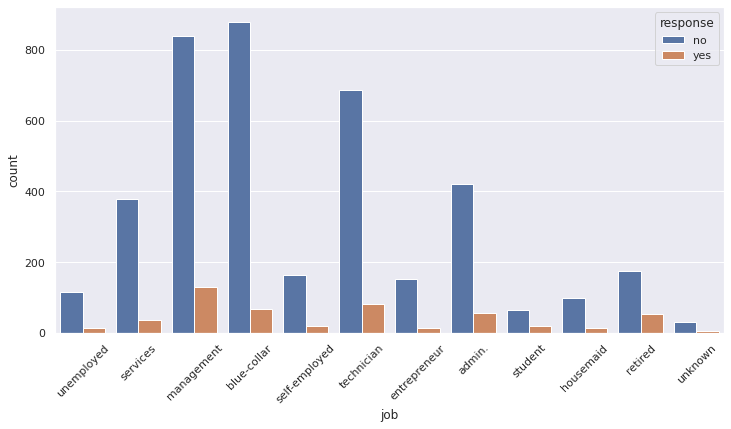

In [60]:
sns.set(rc={'figure.figsize':(12, 6)})
sns.countplot(x="job", hue="response", data=data)
plt.xticks(rotation=45)

In [61]:
# define jobtype variable
job_to_jobtype = {'admin.':'White Collar',
    'entrepreneur':'White Collar',
    'management':'White Collar',
    'self-employed':'White Collar',
    'blue-collar':'Blue Collar',
    'services':'Blue Collar',
    'technician':'Blue Collar'}
data['jobtype'] = data['job'].map(job_to_jobtype)
data['jobtype'] = data['jobtype'].fillna('Other/Unknown')

**"marital status" column**

In [62]:
# set marital variable
marital_to_label = {'divorced':'Divorced',
    'married':'Married',
    'single':'Single'}
data['marital'] = data['marital'].map(marital_to_label)
data['marital'] = data['marital'].fillna('Unknown')

**"education" column**

In [63]:
# set education variable
education_to_label = {'primary':'Primary',\
    'secondary':'Secondary',\
    'tertiary':'Tertiary'}
data['education'] = data['education'].map(education_to_label)
data['education'] = data['education'].fillna('Unknown')

**"default", "housing" and "loan" column**

In [64]:
# set no/yes variable labels
noyes_to_label = {'no':'No', 'yes':'Yes'}
data['default'] = data['default'].map(noyes_to_label)
data['default'] = data['default'].fillna('No')

data['housing'] = data['housing'].map(noyes_to_label)
data['housing'] = data['housing'].fillna('No')

data['loan'] = data['loan'].map(noyes_to_label)
data['loan'] = data['loan'].fillna('No')

**"response" column**

In [65]:
# code response as binary variable
noyes_to_binary = {'no':0, 'yes':1}
data['response'] = data['response'].map(noyes_to_binary)
data['response'] = data['response'].fillna('No')

**Create a clean df**

In [66]:
clean_df = data[['response','age','jobtype', 'education',  'marital', 'default', 'balance', 'housing', 'loan']].reset_index(drop=True)
clean_df.head()

,response,age,jobtype,education,marital,default,balance,housing,loan
0,0,30,Other/Unknown,Primary,Married,No,1787,No,No
1,0,33,Blue Collar,Secondary,Married,No,4789,Yes,Yes
2,0,35,White Collar,Tertiary,Single,No,1350,Yes,No
3,0,30,White Collar,Tertiary,Married,No,1476,Yes,Yes
4,0,59,Blue Collar,Secondary,Married,No,0,Yes,No


In [67]:
cat_cols = ['jobtype', 'education', 'marital', 'housing', 'loan']
for col in cat_cols:
    clean_df[col] = clean_df[col].astype('category')

In [68]:
from sklearn.model_selection import train_test_split
X = clean_df.drop(['response', 'default'], axis=1)
y = clean_df['response']

X, X_test, y, y_test = train_test_split(X, y, test_size=0.25)

X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

Fold : 1
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[10]	valid_0's auc: 0.685883
Performance of the　prediction: , AUC: 0.6858830080980114
****************************************************************************************************
Fold : 2
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[22]	valid_0's auc: 0.641106
Performance of the　prediction: , AUC: 0.6411055988660523
****************************************************************************************************
Fold : 3

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')



Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[7]	valid_0's auc: 0.612608
Performance of the　prediction: , AUC: 0.6126078762027577
****************************************************************************************************
Fold : 4
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.661122
Performance of the　prediction: , AUC: 0.6611217948717948
****************************************************************************************************
Fold : 5


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param

Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[35]	valid_0's auc: 0.590336
Performance of the　prediction: , AUC: 0.590335784488708
****************************************************************************************************
Final score: 0.6382108125054649


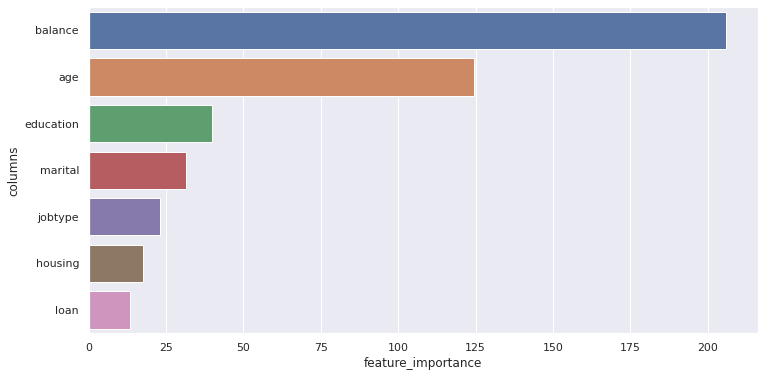

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

params = {
      "objective": "binary", 
      "metric": "auc"
  }

kfold = KFold(n_splits=5, shuffle=True)
models = []
feature_importance = 0
score = 0 

for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):

    print("Fold :", fold + 1)
    
    # Create dataset
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_valid, y_valid = X.loc[val_idx], y[val_idx]

    #RMSPE weight
    lgbm_train = lgbm.Dataset(X_train, y_train, categorical_feature = cat_cols)
    lgbm_valid = lgbm.Dataset(X_valid, y_valid, reference = lgbm_train, categorical_feature = cat_cols)
    
    # model 
    model = lgbm.train(params=params,
                      train_set=lgbm_train,
                      valid_sets=lgbm_valid,
                      num_boost_round=2000,
                      verbose_eval=100,
                      early_stopping_rounds=30
                     )
    
    # validation 
    y_pred = model.predict(X_valid)
    auc = roc_auc_score(y_valid, y_pred)
    print(f'Performance of the　prediction: , AUC: {auc}')

    #keep scores and models
    score += auc / 5
    models.append(model)
    feature_importance += model.feature_importance() / 5
    print("*" * 100)

print(f'Final score: {score}')

feature_importance_df = pd.DataFrame(data={'columns': X.columns, 'feature_importance': feature_importance}).sort_values(by='feature_importance', ascending=False)
sns.barplot(data=feature_importance_df, x='feature_importance', y='columns')

In [70]:
y_pred = 0
for model in models:
    y_pred += model.predict(X)/5

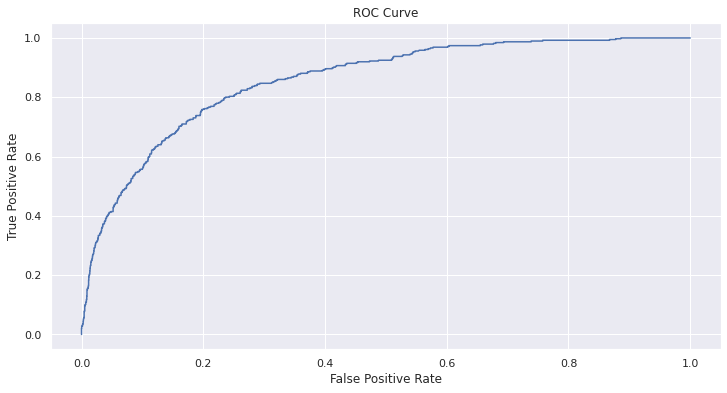

In [71]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_pred)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Lift chart

In [72]:
final_pred = 0
for model in models:
    final_pred += model.predict(X_test)/5

In [73]:
X_test['true_y'] = y_test
X_test['prob_y'] = final_pred
X_test.sort_values(by='prob_y', ascending=False, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test.head()

,age,jobtype,education,marital,balance,housing,loan,true_y,prob_y
0,70,Other/Unknown,Tertiary,Married,15834,No,No,0,0.442621
1,66,White Collar,Secondary,Single,10177,No,No,0,0.425534
2,75,Other/Unknown,Secondary,Married,26452,No,No,0,0.424973
3,66,White Collar,Tertiary,Single,6483,No,No,0,0.422947
4,61,White Collar,Tertiary,Married,6016,No,No,1,0.411005


In [74]:
num_positives = (y_test==1).sum()
decile = [i * 0.1 for i in list(range(1, 11))]
num_obs = [len(X_test)/10 for _ in range(10)]
positive_response_using_model = [(X_test.loc[len(X_test) * (i - 0.1) : len(X_test) * i, 'true_y'] == 1).sum() for i in decile]
cumulative_positive_response_using_model = [(X_test.loc[0 : len(X_test) * i, 'true_y'] == 1).sum() for i in decile]
gain_df = pd.DataFrame(data={'Decile': decile,
                             'Number of Observations divided into 10 sections': num_obs,
                             'Positive Response using Model [X]': positive_response_using_model,
                             'Cumulative Positive Response using Model': cumulative_positive_response_using_model})

gain_df['Gain Score of individual decile [Xi/Total]'] = gain_df['Positive Response using Model [X]'] / num_positives
gain_df['Gain'] = np.cumsum(gain_df['Gain Score of individual decile [Xi/Total]'])
gain_df['Gain'] = round(gain_df['Gain'], 2)
gain_df['Gain Score of individual decile [Xi/Total]'] = round(gain_df['Gain Score of individual decile [Xi/Total]'], 2)
gain_df.style.set_table_styles([dict(selector="th",props=[('max-width', '30px')])])

gain_df

,Decile,Number of Observations divided into 10 sections,Positive Response using Model [X],Cumulative Positive Response using Model,Gain Score of individual decile [Xi/Total],Gain
0,0.1,113.1,27,27,0.20,0.20
1,0.2,113.1,24,51,0.18,0.38
2,0.3,113.1,14,65,0.10,0.48
3,0.4,113.1,12,77,0.09,0.57
4,0.5,113.1,11,88,0.08,0.65
5,0.6,113.1,10,98,0.07,0.73
6,0.7,113.1,14,112,0.10,0.83
7,0.8,113.1,10,122,0.07,0.90
8,0.9,113.1,8,130,0.06,0.96
9,1.0,113.1,5,135,0.04,1.00


(0.0, 1.05)

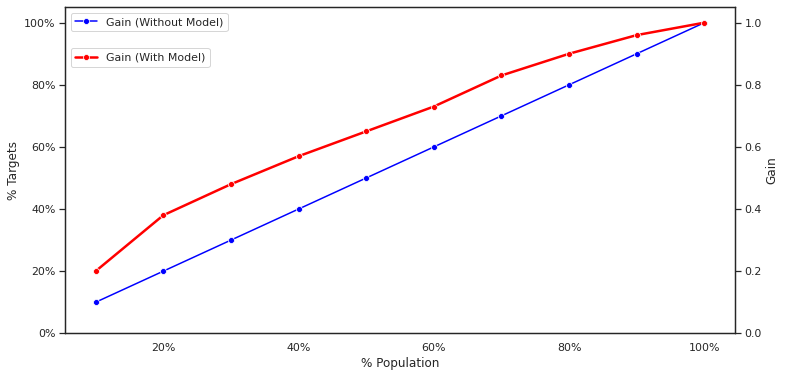

In [75]:
sns.set(style="white")
import matplotlib.ticker as mtick
ax1 = sns.lineplot(data=gain_df, x='Decile', y='Decile', color='blue', label = 'Gain (Without Model)', marker="o")
ax2 = plt.twinx()
sns.lineplot(data=gain_df, x='Decile', y='Gain', color='red', linewidth=2.5, label = 'Gain (With Model)', marker="o")
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(loc="lower left", bbox_to_anchor=(0, 0.8))
ax1.set_ylabel('% Targets')
ax1.set_xlabel('% Population')
ax1.set_xticklabels(['{:,.0%}'.format(x) for x in ax1.get_xticks()])
ax1.set_yticklabels(['{:,.0%}'.format(x) for x in ax1.get_yticks()])
ax1.set_ylim(0, 1.05)
ax2.set_ylim(0, 1.05)

In [86]:
num_positives = (y_test==1).sum()
decile = [i * 0.1 for i in list(range(1, 11))]
cumulative_positive_response_without_model = [num_positives * i for i in decile]
positive_response_using_model = [(X_test.loc[len(X_test) * (i - 0.1) : len(X_test) * i, 'true_y'] == 1).sum() for i in decile]
cumulative_positive_response_using_model = [(X_test.loc[0 : len(X_test) * i, 'true_y'] == 1).sum() for i in decile]

lift_df = pd.DataFrame(data={'Decile': decile,
                             'Cumulative Positive Response without Model [A]': cumulative_positive_response_without_model,
                             'Positive Response using Model': positive_response_using_model,
                             'Cumulative Positive Response using Model [B]': cumulative_positive_response_using_model})

lift_df['Gain'] = np.cumsum(lift_df['Positive Response using Model'] / num_positives)
lift_df['Lift [B/A]'] = lift_df['Cumulative Positive Response using Model [B]'] / lift_df['Cumulative Positive Response without Model [A]']
lift_df['Gain'] = round(lift_df['Gain'], 2)
lift_df['Lift [B/A]'] = round(lift_df['Lift [B/A]'], 2)
lift_df.style.set_table_styles([dict(selector="th",props=[('max-width', '30px')])])
lift_df

,Decile,Cumulative Positive Response without Model [A],Positive Response using Model,Cumulative Positive Response using Model [B],Gain,Lift [B/A]
0,0.1,13.5,27,27,0.20,2.00
1,0.2,27.0,24,51,0.38,1.89
2,0.3,40.5,14,65,0.48,1.60
3,0.4,54.0,12,77,0.57,1.43
4,0.5,67.5,11,88,0.65,1.30
5,0.6,81.0,10,98,0.73,1.21
6,0.7,94.5,14,112,0.83,1.19
7,0.8,108.0,10,122,0.90,1.13
8,0.9,121.5,8,130,0.96,1.07
9,1.0,135.0,5,135,1.00,1.00


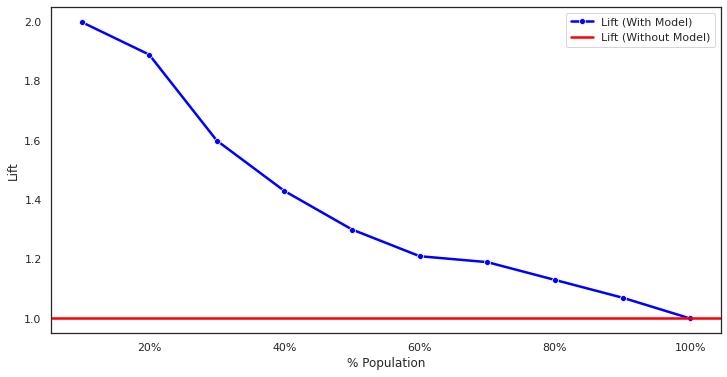

In [77]:
ax = sns.lineplot(data=lift_df, x='Decile', y='Lift [B/A]', color='blue', linewidth=2.5, label='Lift (With Model)',
                  marker="o")
plt.axhline(y=1, color='red', linewidth=2.5, label='Lift (Without Model)')
plt.ylabel('Lift')
ax.set_xlabel('% Population')
ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
plt.legend()

In [78]:
def calculate_revenue(yes, no):
    revenue = 100 * yes
    cost_support = 25 * yes
    cost_mkt = 5 * (yes + no)
    return revenue - cost_support - cost_mkt

net_revenue = []
cut_off_list = [i * 0.01 for i in range(1, 100)]
for cut_off_point in cut_off_list:
    response_arr = X_test[X_test['prob_y'] > cut_off_point]['true_y']
    yes = (response_arr == 1).sum()
    no = (response_arr == 0).sum()
    net_revenue.append(calculate_revenue(yes, no))

Text(0.5, 0, 'Cut-off point')

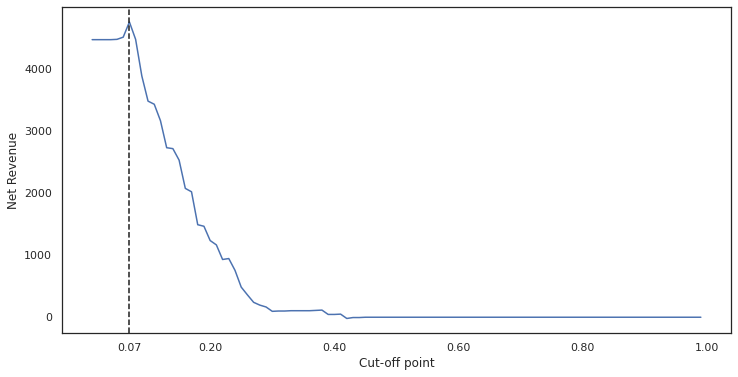

In [82]:
ax = sns.lineplot(x=cut_off_list, y=net_revenue)
plt.axvline(x=cut_off_list[net_revenue.index(max(net_revenue))], color='k', linestyle='--')
ax.set_xticks([0.07, 0.2, 0.4, 0.6, 0.8, 1])
plt.ylabel('Net Revenue')
plt.xlabel('Cut-off point')

In [80]:
gain_df.to_csv('gain_df.csv')
lift_df.to_csv('lift_df.csv')

In [81]:
net_revenue[:10]

[4470, 4470, 4470, 4470, 4475, 4510, 4755, 4475, 3885, 3480]

In [90]:
(X_test['prob_y'] >= 0.07).sum()/len(X_test)

0.870026525198939